# Projet 8: Déployez un modèle dans le cloud

Fruits est une start-up de l'agri-tech qui a pour volonté de préserver la **biodiversité des fruits** en développant des **robots cueilleurs intelligents** qui appliqueraient des **traitements spécifiques à chaque espèce** de fruits lors de la récolte.

Pour se faire connaître auprès du grand public, elle souhaite mettre à sa disposition une **application mobile** qui permettrait aux utilisateurs de **prendre en photo** un fruit et d'obtenir des **informations** sur ce dernier. Trois principaux objectifs:
- sensibiliser le grand public à la biodiversité des fruits
- mettre en place une première version du moteur de classification des images de fruits
- construire une première version de l'architecture Big Data nécessaire

**Contraintes à prendre en compte:**
- le **volume des données va augmenter très rapidement** après la livraison de ce projet => architecture Big Data avec scripts en Pyspark
- compléter le script d'un **traitement de diffusion des poids du modèle Tensorflow sur les clusters**
- compléter le script d'une étape de **réduction de dimension de type PCA** en PySpark
- les **serveurs** doivent être situés sur le **territoire européen**
- faire un **retour critique** sur le choix de l'architecture Big Data choisie

Ce notebook contient les **scripts en PySpark exécutables** sur **Databricks** c'est à dire les **étapes de preprocessing** et la **réduction de dimension** de type PCA (Principal Component Analysis).

## Introduction au Big Data

Le **web 3.0** est celui de la **mobilité**, des **objets connectés** et des **données**. C'est un web sémantique où l'internaute est "fiché", notamment au travers de sa navigation et de ses différents profils sur les réseaux sociaux. 

L'**utilisation massive** d'internet et des objets connectés comme le téléphone, l'ordinateur, la montre, la balance etc engendre la **production de quantités astronomiques de données** ce qui pose des **problématiques de stockage et de traitement approprié** pour les entreprises qui les exploitent afin de prendre notamment des décisions stratégiques et concurrentielles.

Cette infographie offre une vision très parlante du monde de la donnée aujourd'hui:

![Data](files/tables/img/data_infographie.PNG)

A titre d'exemple, en 2009, 800 000 pétaoctets de données étaient produits, 35 zettaoctets en 2020 et plus de 180 zettaoctets de données prévus d'ici 2025 (*5 en 5 ans!).

Il faut donc des **technologies innovantes** capables de traiter:
- des volumes de données énormes et en constante augmentation
- des données provenant de sources multiples et de natures diverses
- des besoins analytiques vitaux à fournir dans des délais impartis

Le Big Data désigne le courant technologique que nous voyons émerger ces dernières années autour des données, des **mégadonnées que nous permettent de stocker aujourd’hui les serveurs**. Le Big Data vient du fait que les données de certaines entreprises ou institutions sont devenues tellement volumineuses que les outils techniques classiques de gestion, de requête sur les bases dites structurées et de traitement des données sont devenus obsolètes, avec des difficultés dans l’instanciation de celles-ci, les temps d’extraction, de traitement devenant trop long.

Le socle commun sur lequel à peu près tout le monde s’entend pour caractériser les problématiques de Big Data, ce sont les 4V : Volume, Vitesse, Variété et Véracité.
- **Volume** : des volumes de données énormes en constante augmentation
- **Vitesse** : des besoins analytiques importants à fournir dans des délais impartis
- **Varieté** : des données provenant de sources multiples et de natures diverses
- **Véracité** : fait référence à la fiabilité de la donnée, la qualité et la précision sont moins vérifiables

Le choix de l'**architecture de données** à mettre en place est donc essentiel.

## Choix d'utiliser Databricks

Plusieurs raisons m'ont poussé à transférer les traitements sur Databricks qui est un environnement SaaS (Software-as-a-Service) permettant d'accéder aux données et aux ressources de calcul:

![Databricks](files/tables/img/databricks_logo.PNG)


- **simplicité**: Databricks permet une seule architecture de données unifiée sur S3 (solution de stockage des données sur Amazon) pour l'analytique SQL, la data science et le machine learning. De plus, aucune expérience avec les systèmes d'exploitation Linux ou Unix n'est demandée.
- **rapport performance / prix**: performances du data warehouse au prix d'un data lake grâce à des clusters de calcul optimisés par SQL
- **réputation**: des clients prestigieux comme HP, Nasdac, Hotels.com ont mis en œuvre Databricks sur AWS pour mettre à disposition une plateforme d'analytique révolutionnaire répondant à tous les cas d'usage de l'analytique et de l'IA.

Construire des modèles de ML est difficile et les mettre en production est encore plus difficile:
- la **diversité des frameworks de ML** complique la gestion des environnements de ML
- les **transferts entre équipes sont difficile**s en raison de la disparité des outils et des processus, de la préparation des données à l'expérimentation et à la production
- la difficulté de suivre les expériences, les modèles, les dépendances et les artefacts rend **difficile la reproduction des résultats**
- il y a des **risques liés à la sécurité et à la conformité**

Le maintien de la qualité des données et de la précision des modèles au fil du temps ne sont que quelques-uns des défis à relever. Databricks va **rationaliser le développement ML**, de la préparation des données à l'entraînement et au déploiement des modèles, à **grande échelle** tout en permettant la collaboration:
- **workspace**: un lieu central pour stocker et partager des notebooks, des expériences et des projets, avec un contrôle d'accès basé sur les rôles
- **notebooks** collaboratifs: prise en charge de plusieurs langues (R, Python, SQL, Scala) et le versionning intégré permettent aux équipes de partager et d'itérer sur le code plus rapidement
- **AutoML**: obtention de résultats plus rapides grâce à l'ajustement automatique des hyperparamètres et à la recherche de modèles avec les intégrations Hyperopt, Apache SparkTM et MLflow
- **Experiments Tracking**: suivre automatiquement les expériences et utiliser les visualisations intégrées pour voir et comparer les résultats de milliers d'essais, sélectionner les paramètres, les mesures et identifier le meilleur essai.
- **Model Registry**: enregistrer le modèle à mettre en production dans un seul endroit et gérer son cycle de vie de manière collaborative

## Monter un bucket AWS S3 sur Databricks

**L'analyse des données directement dans un entrepôt de données peut s'avérer coûteuse**, c'est pourquoi les entreprises recherchent d'autres plateformes capables de stocker et de traiter tout ou partie de leurs données. 

L'un de ces outils est **Amazon S3** qui est un service en ligne qui offre un **stockage flexible aux entreprises**. Son contrôle d'accès granulaire, son chargement de métadonnées et d'autres caractéristiques de ce type en font le premier choix de tous les analystes de données. Aujourd'hui, les entreprises **transfèrent des informations de Databricks vers S3 afin d'utiliser un espace de stockage évolutif à un prix inférieur**.

Pour monter un bucket AWS S3 sur Databricks, se référer au notebook suivant:
- Mount_AWS_S3_Bucket.ipynb

## Import des librairies

In [0]:
# Python
from PIL import Image
import time
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt

# Pyspark
from pyspark.sql.functions import col, pandas_udf, PandasUDFType, element_at, split, countDistinct

# Tensorflow
import tensorflow as tf

# Preprocessing images pour VGG16
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# ACP
from pyspark.ml.linalg import Vectors, VectorUDT
from pyspark.ml.feature import StandardScaler
from pyspark.ml.feature import PCA

## Chargement des données depuis Amazon S3

In [0]:
# Vérification du dossier où sont stockées les images
dbutils.fs.ls("/mnt/fruits-pictures/Test/")

[FileInfo(path='dbfs:/FileStore/tables/test_local/Apple Red Delicious/', name='Apple Red Delicious/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/test_local/Banana/', name='Banana/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/test_local/Cauliflower/', name='Cauliflower/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/test_local/Walnut/', name='Walnut/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/test_local/Watermelon/', name='Watermelon/', size=0, modificationTime=0)]

In [0]:
# Chargement des images au format image pour affichage
df_img_watermelon = spark.read.format("image").load("/mnt/fruits-pictures/Test/Watermelon")

# Affichage des images
display(df_img_watermelon)

image


Les différentes vues du fruit sont présentes dans des dossiers qui portent le nom du fruit. Nous allons **charger les données avec une extension.jpg** puis nous **rajouterons une colonne "Label"** correspondant au nom du dossier dans lequel se situent les images. Databricks recommande d'utiliser la source de données **fichier binaire** pour charger les données d'image dans le DataFrame Spark sous forme d'octets bruts.\
https://docs.databricks.com/external-data/image.html

Databricks prend en charge les fichiers binaires et convertit chacun d’eux en un enregistrement unique qui contient le **contenu brut et les métadonnées du fichier**. La source de données de fichier binaire produit un DataFrame avec les colonnes suivantes et éventuellement des colonnes de partition :
- **path (StringType)** : Chemin d'accès au fichier.
- **modificationTime (TimestampType)** : Heure de dernière modification de l'événement. Dans certaines implémentations Hadoop FileSystem, ce paramètre peut ne pas être disponible et la valeur est définie sur une valeur par défaut.
- **length (LongType)** : Longueur du fichier en octets.
- **content (BinaryType)** : Contenu du fichier.

In [0]:
# Chemin d'accès des données
path_data = "/mnt/fruits-pictures/Test/"

# lecture des fichiers jpg de manière récursive à partir du répertoire 
# d'entrée en ignorant la détection de la partition
images = spark.read.format("binaryFile") \
  .option("pathGlobFilter", "*.jpg") \
  .option("recursiveFileLookup", "true") \
  .load(path_data)

In [0]:
display(images.limit(5))

path modificationTime length content dbfs:/FileStore/tables/test_local/Watermelon/r_63_100.jpg 2023-06-28T18:35:48.000+0000 7251 List(/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYFBgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoKCgoKCgoKCgoKCgoKCgo= (truncated), iVBORw0KGgoAAAANSUhEUgAAAGQAAABkCAIAAAD/gAIDAABXuUlEQVR42qy8B3gk2XkdCppp0+QIYJBzbACNzjnnnHPOubs655yQ08xgct68XC4pJkkUSVOUTIlUsCxbTpKe3rOeracnklpuGMzABWBmuZIoP0t6/d2vuxpdqL517vnPf/5bt7pj/5/0eHrQnjzeA18fP2tPn+5/DLb9J0+Pdtnb3//wycHzwc5P9vafPtk/3PPD/f2PDp9//mT/g/39v93f/+0/+auv/PA/f+3f/sWXf/xn7/zOf3nvR3/2pX/zH9/54X945wd/+Cu/9e/e+c7vPvrejx59/8fv/vYf/fX+/v+7v/83+/s/BTcO/x081N6Tg2/46LAdftdhe3q0/XT/6eOnT8COfLy3//jDp4f7Pjns3NEO/+CkftGen8Xe890/eXTs/1MfR3jtP/3oyd7jZ8c67CbYvb0njx8/fnr4HeAL2MCNj57uv793gNGf/vVP/vj//Mvf/69//vArX9u8c7+8sZ3b2IyvbyS3d/I3blXv3G/cvl+7drt+687Kvfsb9++3bt5IX9nyLzechUJieaVydXf79Tde//Vvf+8P/ug//t9/9Wf/4/95fAjTz/f333/6ydgcduQZIh8f9eLxAV77z8F6+veR+kfAevr/C1h7Tx8fwPPkyf4nQ/jsqGB/Hh/1Cnx8sHfAnV/98Z/+xh/8X2/9xu9vvPpecnPLXy+6ioAj5460I/GVcLDpATaCjqrFWbZmthP1q/n1283VW9WVm5W127WNh63sbtpWsrqKDm/Fb8m7NDFLbDldv768fu/yldfuvfr1r3/jhz/+jT/8k58eEnbvqFdHo3fQvScfPf754ZA9fvbXxx8e9fCXgfOPArj/LwELHCAwyJ7x+qgXh0d9+uQQqcNAAMP0v/zlf3/7u7+98/Y3UxvX/fUle7moiHoUgFERUQvcLG1C7K5qzXmJqSDVpLkqgOGrKFvXQmvXgWuP8rsPc1sP0qv3k8lNuyklDNaMkYbDkjVKQzJb1pLdzDRuNhu3lms3Npt3r68+uHfnvfd+9d/88P3DYP/oycHYgXjsPX3yTDOefPyc/o8P6fa/BdYvffzTw/AZ10FcQHwOWH3QsyeHOB4O4p/+t5+89fVvLt+8Urzczm5VSlfKtRvF3OWko6hXRfhiL4NlwjFMeJaVxHHRdHm1FOCJfDRrVpJbs2/ei11/lAHblUeZ7YepymW3Lc4zBNgKD9OU0ilCSqFTqAjIrDmTt+mObcdKt4rl3VxxK9e8sXHnq+9963f+8K8+PgjMjw6J9tHHTw+4/+Q5UgeEe3zY30/a/j8JuH8qWAffd/TFhxF4ANpHewfvPz7s4pe/8e316zcTzWJus5TZTBZ3opl1d+2qt7TtrN8IgC3WNtrSUrYZT9ZhcVos28thuhksB0kd4eTWrRt3o7uP0lfuJbbuxDYOW33HU1xzlbeC9ZvF7OWMLqJVhRRcF1uekNiq2uqdRPt2vHUzXdqtVK6vtu/de/DNb4OQgQrw/hFke5+wHqT748N3/9tg/YM/dfxzaLV/KFhPD6F6coDUX/5k/8u/8bvr9x4V1yuF1UR6JVzcAjIb3uKOr7zlzq9Yajuu6ra9tuNoXPVmN23xNaciwoOK54hmEtGAA6MyfyXYuObfvJ8AgxGMwe37ybUb4bVrwa1b0ZXdcONKZPO16vKDqiWu14TUHBdPEpUG2pbWnXj9aqC05U2suNNb8dRmrrC7Xrlx/+ZXv/+NH/1XELIPHj8X/sMY+PhA4X/p6Tz5JZD9i8E6IteTTxI0OFY/29t/8OVvFTZ3gWYl1grEl2zZVUdh251YNqfXbOUtZ7yuzrb01Q1rcVWfbGsSK8b0llvgYyDVCIKJuCCC6FPSxp1kfsNW3/W1b0c3H6S37se378a2boQv34pt3YrvPMhtv15euV9oXMsL7Gy6lSkBZPF179ZrpfU7qcqWL1Qz6MIieUCsTzrFAZ+93K7cfvON7/zog6Pzffwsg+99YnD+AVj7/xKwnuW7g6h/tv3pIxwlaDAHfe17P968+yDeKMQbiXgzEG87Qw09CEfpiiu36QTBSi4Zki1dftWcWtICNXlu3RJs6TgOAsWCR2nQC1IoQg7HKhfseUXjZrC84yxedmY2TFffiG/dDWzeCu3ciV99ULz6qLL5IL95v7B8PR0omSlmMtVCja9Flm4V1+7kV26myjsxjV8ssQlEDrGvFnGUo/J40Flr3P7Kr/3s0EE8txZ7R2d0pCFHdgd83tvb+zS//jnMOjzE8398+vSIUEdsAocKHLQv/cbvNq7d9RfTQB3ILAX8eY01JZH5qdG2Lrtmya5Y82v2WF0HVFVARZFuazMr+syGxVtTkYxwspWA1WOgskWsBgUTTXFtOEdO3LgZWLsXLW5bV+8EVm/5d1/PXnmQ2ryV3rlfWLud3n29unU3t/OoXLmVw+vw9oJj+X5r9fYBgvXdTKjqpsqJaq88t5EsXis561FxxGnMpq+++977h719vPcMpYPTAc3yx48PsHj8LLP/i8B6NgKf2gCxe3IY/HuH3/3Gr/5m6fJuoJKN1CKJVtBX1NP0CKYVj1fOK310U5DlArgWPx189qfE4aw429LmV42ZNUN62+aoyDHaeWVCZK0YIus+joM0xx5KbXoqV/3L1yOgroMQ+wvy0pZ75VZk+04SNBM7DzLrt5PXHpUvPygt3a9YizZRSOtvARt3qyBY1d0k0PYbImqpTexPuxN1oLRbksf0TI/MXIltvvXmV3/zdz96cpCvwc5//Em8ffz0mel/Hp3/68z4/wHWJ8H4SSSC4wFmmfe+86PM6o4rlwzXY8llwJpUa2MCf8sEnjZJA2dqEVw1XKlHhmL8UstUW3fkmvpUTZlf1Zd2LMktkybJMBXFsW1P8UbU3zAZk2K4YMyal5d3/Zu3o8u7gdqVoLugknjJIN1q2+7V66Hd1wrb97ObN9LXHtauv7OZv1pguWWOerB1q7B6O1MBBfNOPt4OU6Qko9foibssSbMqriHYWdyIXpdNrDx445s/+PFRLfHRYWAeQPT4yMv+Ap5/JlifhgwsYo7efvB478PDrNzYvhYtl2PlZLgc5Nu5NDNFn5PpsxK8EooUTnONGGdMnK1oqm1DpiovrehrG8bCiia9rPJV+KYMQxLCWUvCwnVv5VoAZFN+y5VYtTDNsNbd8NpNT/uqvXk94CopSfoFnhO3cgfYvp/evpPefVBev5xub6ZbuwVP2UN3SRgeUQ2Urfv5zVfzK/cyzWtFuUPG1YptMa8z79MkzAQTC2vgUCxKT6MCVkvvfOd73/+3f/yzo6jcfx58e88rpH8hs47IdbS9d6hhf/n+46Wbd0P5fDAL2CMmphJPUmJQChhet4iQT5PUC8YoP7liA9Wqum7JN1SFJXW2LS+t6XKrmnhbrouSeB4Ey4WgW6CeuqJ4xVu7FsxveQIN/RTzErBmXLrp3XkU2X41HVu10WxYaYSdXnNs3Elt3U7t3M4ub0Xz9UCiGpK4lRgth2IXG7Om9r3iFhinD0vNywWpVUFViIgKAV7NgYqJFKsIrWHj9SKCTuIoxrbeuLf7pbe/+oPffv8wiT8+ND9/ryT8ZzLrE7yOyAW+BZ3n7qvv+ot1rc92MIZ6Kl40z9Ih2UY0WblIkEHm

In [0]:
# 5 premières lignes du dataframe issu de la source de données de fichier binaire
images.show(5)

+--------------------+-------------------+------+--------------------+
|                path|   modificationTime|length|             content|
+--------------------+-------------------+------+--------------------+
|dbfs:/FileStore/t...|2023-06-28 18:35:48|  7251|[FF D8 FF E0 00 1...|
|dbfs:/FileStore/t...|2023-06-28 18:35:48|  7071|[FF D8 FF E0 00 1...|
|dbfs:/FileStore/t...|2023-06-28 18:35:47|  7018|[FF D8 FF E0 00 1...|
|dbfs:/FileStore/t...|2023-06-28 18:35:47|  7018|[FF D8 FF E0 00 1...|
|dbfs:/FileStore/t...|2023-06-28 18:35:47|  6855|[FF D8 FF E0 00 1...|
+--------------------+-------------------+------+--------------------+
only showing top 5 rows



Même si l'objectif du projet n'est pas de faire la classification, nous allons extraire le nom du fruit / légume à partir de la colonne "path":

In [0]:
# Création colonne label
df_images = images.withColumn('label', element_at(split(images['path'], '/'),-2)) 
print(df_images.printSchema())

# Affichage des 5 premières lignes
df_images.show(5)

root
 |-- path: string (nullable = true)
 |-- modificationTime: timestamp (nullable = true)
 |-- length: long (nullable = true)
 |-- content: binary (nullable = true)
 |-- label: string (nullable = true)

None
+--------------------+-------------------+------+--------------------+----------+
|                path|   modificationTime|length|             content|     label|
+--------------------+-------------------+------+--------------------+----------+
|dbfs:/FileStore/t...|2023-06-28 18:35:48|  7251|[FF D8 FF E0 00 1...|Watermelon|
|dbfs:/FileStore/t...|2023-06-28 18:35:48|  7071|[FF D8 FF E0 00 1...|Watermelon|
|dbfs:/FileStore/t...|2023-06-28 18:35:47|  7018|[FF D8 FF E0 00 1...|Watermelon|
|dbfs:/FileStore/t...|2023-06-28 18:35:47|  7018|[FF D8 FF E0 00 1...|Watermelon|
|dbfs:/FileStore/t...|2023-06-28 18:35:47|  6855|[FF D8 FF E0 00 1...|Watermelon|
+--------------------+-------------------+------+--------------------+----------+
only showing top 5 rows



## Quelques statistiques

In [0]:
# Nombre d'images par label
df_images.groupBy("label").agg(countDistinct('path')).show()

+-------------------+--------------------+
|              label|count(DISTINCT path)|
+-------------------+--------------------+
|             Banana|                   5|
|             Walnut|                   5|
|        Cauliflower|                   5|
|Apple Red Delicious|                   5|
|         Watermelon|                   5|
+-------------------+--------------------+



In [0]:
# Calcul du nombre de labels
df_images.select(countDistinct("label")).show()
#images.select('label').distinct().count()

+---------------------+
|count(DISTINCT label)|
+---------------------+
|                    5|
+---------------------+



In [0]:
# Calcul du nombre d'images
df_images.select(countDistinct("path")).show()

+--------------------+
|count(DISTINCT path)|
+--------------------+
|                  25|
+--------------------+



## Preprocessing des données

Une série de modèles très performants ont été développés pour la classification d'images et démontrés lors du concours annuel ImageNet.
Ces modèles peuvent être utilisés comme base pour l'apprentissage par transfert dans les applications de vision par ordinateur pour plusieurs raisons:
- Les modèles ont appris à détecter les **caractéristiques génériques des photographies**, étant donné qu'ils ont été **entraînés sur plus de 14 000 000 d'images pour 1 000 catégories**.
- **Performances de pointe** : Les modèles ont atteint une performance de pointe et restent efficaces dans la tâche spécifique de reconnaissance d'images pour laquelle ils ont été développés.
- **Facilité d'accès** : Les poids des modèles sont fournis sous forme de fichiers téléchargeables gratuitement et de nombreuses bibliothèques fournissent des API pratiques pour télécharger et utiliser les modèles directement.

Il existe une douzaine de modèles de reconnaissance d'images très performants qui peuvent être téléchargés et utilisés comme base pour la reconnaissance d'images et les tâches connexes de vision par ordinateur.

Trois des modèles les plus populaires sont les suivants :
- VGG (par exemple, VGG16 ou VGG19)
- GoogLeNet (par ex. InceptionV3)
- Réseau résiduel (par exemple, ResNet50)

**Keras** donne accès à un certain nombre de modèles pré-entraînés très performants qui ont été développés pour des tâches de reconnaissance d'images.

Ils sont disponibles via l'API d'applications et comprennent des fonctions permettant de **charger un modèle avec ou sans les poids pré-entraînés**, et de **préparer les données** d'une manière qu'un modèle donné peut attendre (par exemple, la mise à l'échelle de la taille et des valeurs des pixels)\
https://keras.io/api/applications/vgg/

Le modèle pré-entraîné peut être utilisé comme un programme autonome pour extraire des caractéristiques de nouvelles photographies.

Ici nous allons exploiter le réseau de neurones pré-entrainé **VGG16 pour extraire les features** c’est-à-dire se servir des features du réseau pour représenter les images du nouveau problème. La dernière couche fully-connected sera retirée car nous ne souhaitons pas à ce stade effectuer la classification.

La taille d'entrée par défaut des images pour ce modèle est **224x224**. Chaque application Keras attend un type spécifique de prétraitement des entrées. Pour VGG16:
- conversion des images d'entrée de RGB à BGR
- centrage à zéro de chaque canal de couleur par rapport à l'ensemble de données ImageNet, sans mise à l'échelle \
Ce preprocessing est effectué par la fonction tf.keras.applications.vgg16.preprocess_input

Nous allons charger chaque photo au format binaire, télécharger et préparer le modèle comme un modèle d'extraction de caractéristiques (c'est-à-dire enlever la dernière couche) puis extraire ces caractéristiques de la photo chargée à l'aide d'un UDF pandas Scalar Iterator.

Nous allons reprendre le script de la documentation issue de Databricks en l'adaptant à un modèle VGG16: \
https://docs.databricks.com/machine-learning/preprocess-data/transfer-learning-tensorflow.html

### Préparation du modèle

Les workers Spark ont besoin d'accéder au modèle et à ses poids. Le modèle sera chargé dans le pilote Spark puis les poids seront ensuite diffusés aux workers. \
Au lieu de distribuer ces informations avec chaque tâche sur le réseau (surcharge et perte de temps), les variables de diffusion sont utilisées. Ce sont des **variables partagées en lecture seule** qui sont **mises en cache et disponibles sur tous les nœuds du cluster** afin que les tâches puissent y accéder ou les utiliser. PySpark distribue donc les variables de diffusion aux travailleurs à l'aide d'algorithmes de diffusion efficaces afin de **réduire les coûts de communication au lieu d'envoyer ces données avec chaque tâche**.

Nous utiliserons un modèle **VGG16** auquel nous **enlevons la dernière couche** car il s'agit ici d'extraire les features mais pas de faire la classification. Les images données au modèle seront de taille **224*224 en couleur**. Nous choisissons l'hyperparamètre **Pooling = max** afin de sélectionner la valeur la plus significative des features (la valeur maximale). Ce choix va permettre de **diminuer la taille de la matrice de features** et donc accélérer les calculs notamment pour la standardisation et le PCA.

In [0]:
# Modèle VGG16
train_time = time.time()
# Chargement du modèle VGG16 et suppression de la dernière couche
model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3), pooling='max')
# Vérification de la suppression de la dernière couche (predictions (Dense & Fully Connected))
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [0]:
# Broadcasting des poids (on récupère les poids du modèle cad imagenet => on passe en C plus bas niveau donc plus rapide)
bc_model_weights = sc.broadcast(model.get_weights())

def model_fn():
    """ Modèle VGG16 avec suppression de la dernière couche et broadcasting des poids """
    model = VGG16(weights=None, include_top=False, input_shape=(224,224,3), pooling='max')
    model.set_weights(bc_model_weights.value)
    return model

### Définition du processus de chargement des images et application de leur featurisation à travers l'utilisation de pandas UDF

Le nouveau Scalar Iterator pandas UDF est utilisé afin **d'amortir le coût du chargement de grands modèles sur les workers**. Il permet des **opérations vectorisées** qui peuvent augmenter les performances jusqu'à 100 fois par rapport aux UDF Python ligne par ligne.

In [0]:
def preprocess(content):
    """ Preprocessing des images conservées sous forme 
    d'octets dans un cache en mémoire.
    
    Arguments:
    --------------------------------
    content: : image au format binaire
    
    return:
    --------------------------------
    Image redimensionnée et preprocessée au format array """
    
    # Taille d'entrée des images pour le VGG16: 224 * 224
    img = Image.open(io.BytesIO(content)).resize([224, 224])
    # Format array
    arr = img_to_array(img)
    # Centrage à zéro de chaque canal de couleur par rapport à l'ensemble de données ImageNet, sans mise à l'échelle 
    return preprocess_input(arr)


def featurize_series(model, content_series):
    """ Extraction des caractéristiques des images au format Array
    par le modèle indiqué en entrée.
    
    Arguments:
    --------------------------------
    model: modèle d'extraction des features
    content_series: images redimensionnées et preprocessées au format array
    
    return: 
    --------------------------------
    caractéristiques de l'image au format pd.Series """
    
    # Parallélisation des calculs pour le preprocessing des images
    input = np.stack(content_series.map(preprocess))
    # Extraction des features
    preds = model.predict(input)
    # Pour certaines couches, les caractéristiques de sortie seront des tenseurs multidimensionnels.
    # Vectorisation des features tensors pour faciliter le stockage dans les Spark DataFrames
    output = [p.flatten() for p in preds]
    return pd.Series(output)

In [0]:
# Méthode renvoie une colonne Spark DataFrame de type ArrayType(FloatType).
@pandas_udf('array<float>', PandasUDFType.SCALAR_ITER)
def featurize_udf(content_series_iter):
    """ Fonction qui charge le modèle VGG16 avec suppression de la dernière couche et broadcasting des poids
    puis applique l'extraction de features de manière itérative aux images redimensionnées et preprocessées 
    au format array
    
    Arguments:
    --------------------------------
    content_series_iter: itérateur des images redimensionnées et preprocessées au format array
    
    return: 
    --------------------------------
    caractéristiques de l'image au format pd.Series """

  # Avec les Pandas UDF Scalar Iterator, nous pouvons charger le modèle une fois et le réutiliser ensuite
  # pour plusieurs lots de données.  Cela permet d'amortir les frais généraux liés au chargement de gros modèles
    model = model_fn()
    for content_series in content_series_iter:
        yield featurize_series(model, content_series)

/databricks/spark/python/pyspark/sql/pandas/functions.py:404: UserWarning: In Python 3.6+ and Spark 3.0+, it is preferred to specify type hints for pandas UDF instead of specifying pandas UDF type which will be deprecated in the future releases. See SPARK-28264 for more details.
  warnings.warn(


### Exécutions des actions d'extractions de features

Les partitions de données dans Spark sont converties en lots d'enregistrements Arrow (format de données en colonnes), ce qui peut temporairement conduire à une utilisation élevée de la mémoire. \
Pour éviter d'éventuelles exceptions de mémoire insuffisante, la taille des lots d'enregistrements Arrow peut être ajustée en définissant la conf "spark.sql.execution.arrow.maxRecordsPerBatch" à un entier qui déterminera le **nombre maximum de lignes pour chaque lot**. La valeur par défaut est de 10 000 enregistrements par lot. Si le nombre de colonnes est élevé, la valeur doit être ajustée en conséquence. En utilisant cette limite, chaque partition de données sera divisée en un ou plusieurs lots d'enregistrements pour le traitement.

https://spark.apache.org/docs/3.0.0/sql-pyspark-pandas-with-arrow.html

In [0]:
# Les Pandas UDF sur des enregistrements de grande taille peuvent rencontrer des erreurs de type Out Of Memory.
# Si c'est le cas, tenter de réduire la taille de `maxRecordsPerBatch`:
spark.conf.set("spark.sql.execution.arrow.maxRecordsPerBatch", "1024")

In [0]:
features_df = df_images.repartition(16).select(col("path"), col("label"), featurize_udf("content").alias("features"))

In [0]:
# Affichage des 5 premières lignes du dataframe partitionné par hachage (16 partitions)
features_df.show(5)

+--------------------+-----------+--------------------+
|                path|      label|            features|
+--------------------+-----------+--------------------+
|dbfs:/FileStore/t...|Cauliflower|[87.58698, 0.0, 1...|
|dbfs:/FileStore/t...|     Banana|[0.0, 18.629759, ...|
|dbfs:/FileStore/t...|     Walnut|[19.263742, 0.0, ...|
|dbfs:/FileStore/t...|     Banana|[0.0, 52.27511, 7...|
|dbfs:/FileStore/t...|Cauliflower|[65.55408, 0.0, 1...|
+--------------------+-----------+--------------------+
only showing top 5 rows



## Réduction de dimension par ACP

Nous allons réaliser une ACP qui va permettre de **créer des features décorrélées entre elles**, de **diminuer leur dimension** tout en gardant un **niveau de variance expliquée élevée**. \
La réduction de dimension sera effectuée à l'aide de la documentation ci-dessous: \
https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/index.html \
https://github.com/apache/spark/blob/master/examples/src/main/python/ml/pca_example.py \
https://people.duke.edu/~ccc14/sta-663-2016/21D_Spark_MLib.html

Afin de ne pas avoir l'erreur "Column must be of type class org.apache.spark.ml.linalg.VectorUDT", nous allons transformer la colonne feature et la mettre au format vecteur dense. \
https://stackoverflow.com/questions/49623620/what-type-should-the-dense-vector-be-when-using-udf-function-in-pyspark

In [0]:
# Transformation de la colonne features en vecteur dense
vec_dense = udf(lambda r: Vectors.dense(r), VectorUDT())
features_df_vectorized = features_df.withColumn('features_vectorized', vec_dense('features'))

In [0]:
features_df_vectorized.printSchema()

root
 |-- path: string (nullable = true)
 |-- label: string (nullable = true)
 |-- features: array (nullable = true)
 |    |-- element: float (containsNull = true)
 |-- features_vectorized: vector (nullable = true)



In [0]:
# Standardisation (moyenne = 0 et écart type = 1)
scaler = StandardScaler(withMean=True, withStd=True,
                        inputCol='features_vectorized',
                        outputCol='std_features')

model = scaler.fit(features_df_vectorized)
features_df_std = model.transform(features_df_vectorized)

In [0]:
# ACP avec le nombre max de features 
nb_comp = 25

pca = PCA(k = nb_comp, inputCol="std_features", outputCol="pcaFeatures")
pca_model = pca.fit(features_df_std)

cumValues = pca_model.explainedVariance.cumsum()
print(cumValues)

[0.14890668 0.27811037 0.38335343 0.4610524  0.53447069 0.58724116
 0.63155878 0.67144885 0.7030721  0.73349208 0.76169293 0.78644291
 0.81051165 0.83380013 0.85508737 0.87565996 0.89484986 0.91305519
 0.9310524  0.94732964 0.96207054 0.97577756 0.98830178 1.
 1.        ]


Text(0, 0.5, 'Variance expliquée cumulée')

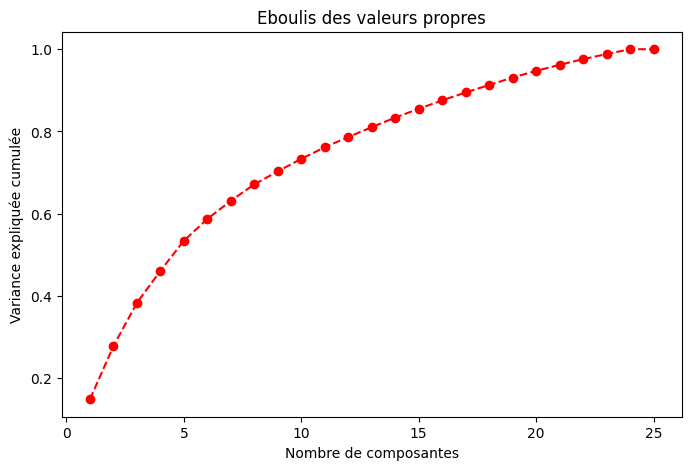

In [0]:
# Affichage de l'éboulis des valeurs propres 
plt.figure(figsize=(8,5))
plt.plot(range(1,nb_comp+1), cumValues, marker = 'o', linestyle='--', c="red")
plt.title("Eboulis des valeurs propres")
plt.xlabel("Nombre de composantes")
plt.ylabel("Variance expliquée cumulée")

Le graphique montre la quantité de variance capturée (sur l'axe des y) en fonction du nombre de composantes que nous incluons (sur l'axe des x). Une règle empirique consiste à **préserver environ 80 % de la variance**. Nous allons récupérer le nombre de composante qui conserve au moins 80% de la variance et effectuer l'ACP dessus:

In [0]:
k_optimal = np.where(cumValues>=0.8)[0][1]
print(k_optimal)

13


In [0]:
# ACP avec le nombre de composantes optimal
pca_k_opti = PCA(k=k_optimal, inputCol="std_features", outputCol="pcaFeatures")
pca_model_k_opti = pca_k_opti.fit(features_df_std)
features_df_pca = pca_model_k_opti.transform(features_df_std)

In [0]:
features_df_pca.show(5)

+--------------------+-----------+--------------------+--------------------+--------------------+--------------------+
|                path|      label|            features| features_vectorized|        std_features|         pcaFeatures|
+--------------------+-----------+--------------------+--------------------+--------------------+--------------------+
|dbfs:/FileStore/t...|Cauliflower|[87.58698, 0.0, 1...|[87.5869827270507...|[1.34872231710348...|[-11.117466836358...|
|dbfs:/FileStore/t...|     Banana|[0.0, 18.629759, ...|[0.0,18.629758834...|[-1.4725925712260...|[11.3108607547413...|
|dbfs:/FileStore/t...|     Walnut|[19.263742, 0.0, ...|[19.2637424468994...|[-0.8520770370883...|[0.20218448897648...|
|dbfs:/FileStore/t...|     Banana|[0.0, 52.27511, 7...|[0.0,52.275108337...|[-1.4725925712260...|[10.7046810346028...|
|dbfs:/FileStore/t...|Cauliflower|[65.55408, 0.0, 1...|[65.5540771484375...|[0.63900766994163...|[-12.881621663837...|
+--------------------+-----------+--------------

In [0]:
duration_vgg16 = np.round(time.time() - train_time,0)
print(f"Temps de traitement: {duration_vgg16} secondes")

Temps de traitement: 254.0 secondes


## Sortie de la réduction de dimension au format parquet

Apache Parquet est un format de fichiers orienté colonne, initialement développé pour l'écosystème de calcul distribué Apache Hadoop. Il est similaire aux autres formats de fichiers de stockage colonnaires disponibles dans Hadoop, à savoir RCFile et Optimized RCFile. Il est compatible avec la plupart des frameworks de traitement de données de l'environnement Hadoop. Il fournit des schémas efficaces de compression et de codage de données avec des performances améliorées pour gérer des données complexes en masse. \
https://fr.wikipedia.org/wiki/Apache_Parquet

In [0]:
# Enregistrement au format parquet
features_df_pca.write.mode("overwrite").parquet("/mnt/fruits-pictures/fruits360_photos_features")

In [0]:
# Lecture du fichier parquet
df = spark.read.parquet("/mnt/fruits-pictures/fruits360_photos_features")

print(df.count())
df.show()

25
+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+
|                path|              label|            features| features_vectorized|        std_features|         pcaFeatures|
+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+
|dbfs:/FileStore/t...|Apple Red Delicious|[25.642473, 0.0, ...|[25.6424732208251...|[-0.6466080559589...|[8.09184481539826...|
|dbfs:/FileStore/t...|Apple Red Delicious|[20.09487, 0.0, 0...|[20.0948696136474...|[-0.8253051198852...|[7.22324860982282...|
|dbfs:/FileStore/t...|             Banana|[0.0, 4.8649526, ...|[0.0,4.8649525642...|[-1.4725925712260...|[10.8191091953326...|
|dbfs:/FileStore/t...|         Watermelon|[46.67027, 32.681...|[46.6702690124511...|[0.03073041933185...|[-2.4627108897518...|
|dbfs:/FileStore/t...|        Cauliflower|[93.57688, 22.086...|[93.5768814086914...|[1.54166640313008...|[-1

In [0]:
# Suppression dossier (non vide)
#dbutils.fs.rm('dbfs:/ml',True)